In [334]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [335]:
import os
root_directory = "/home/wayne/Documents/GitHub/MLPractise/ToyDataSetsPractise/Titanic_Dataset"

for subdir, dirs, files in os.walk(root_directory):
    for files in files:
        print(os.path.join(subdir, files))


/home/wayne/Documents/GitHub/MLPractise/ToyDataSetsPractise/Titanic_Dataset/data/Titanic-Dataset.csv
/home/wayne/Documents/GitHub/MLPractise/ToyDataSetsPractise/Titanic_Dataset/notebook/main.ipynb


In [336]:
df = pd.read_csv("/home/wayne/Documents/GitHub/MLPractise/ToyDataSetsPractise/Titanic_Dataset/data/Titanic-Dataset.csv")

In [337]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [338]:
"""The attributes have the following meaning:

    Survived - that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
    Pclass - passenger class.
    Name, Sex, Age - self-explanatory
    SibSp - how many siblings & spouses of the passenger aboard the Titanic.
    Parch - how many children & parents of the passenger aboard the Titanic.
    Ticket - ticket id
    Fare - the price paid (in pounds)
    Cabin - passenger's cabin number
    Embarked - where the passenger embarked the Titanic
    
"""

"The attributes have the following meaning:\n\n    Survived - that's the target, 0 means the passenger did not survive, while 1 means he/she survived.\n    Pclass - passenger class.\n    Name, Sex, Age - self-explanatory\n    SibSp - how many siblings & spouses of the passenger aboard the Titanic.\n    Parch - how many children & parents of the passenger aboard the Titanic.\n    Ticket - ticket id\n    Fare - the price paid (in pounds)\n    Cabin - passenger's cabin number\n    Embarked - where the passenger embarked the Titanic\n\n"

In [339]:
df.columns = df.columns.str.lower()
df.drop(columns=["passengerid", "ticket", "cabin"], axis=1, inplace=True)

In [340]:
# The following features doesn't contribute in any value as a feature and is more like identifiers

In [341]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [342]:
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   fare      891 non-null    float64
 8   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [344]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [345]:
print(f"Count of NA Values in the Dataset: {df.isna().sum().sum()}")
print()
print(f"Na Values by columns: {df.isna().sum()}")
print()
print(f"Shape of the dataset: {df.shape}")
print()
print(f"Column Data Types: {df.dtypes}")

Count of NA Values in the Dataset: 179

Na Values by columns: survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

Shape of the dataset: (891, 9)

Column Data Types: survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object


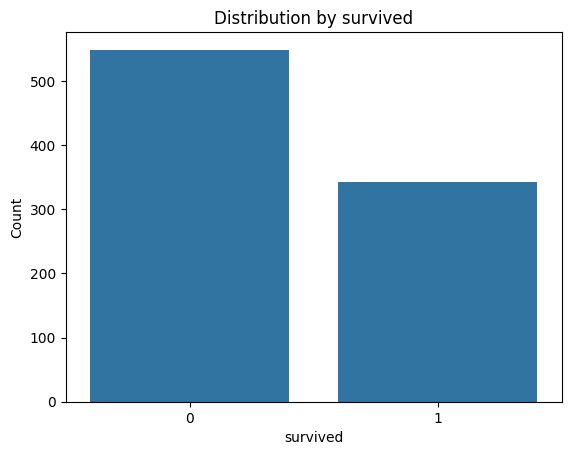

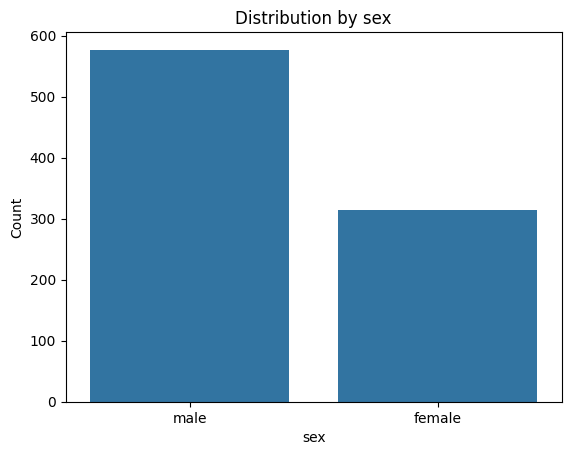

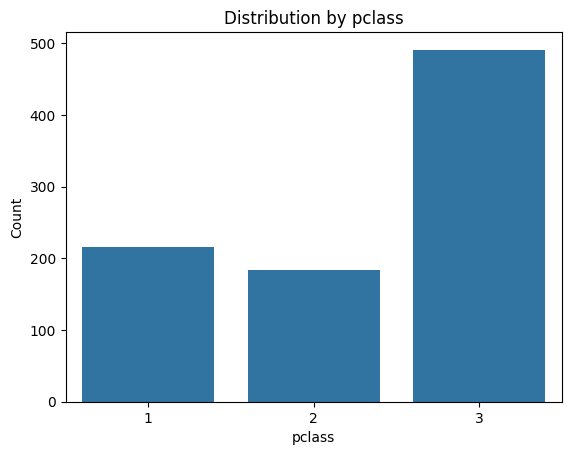

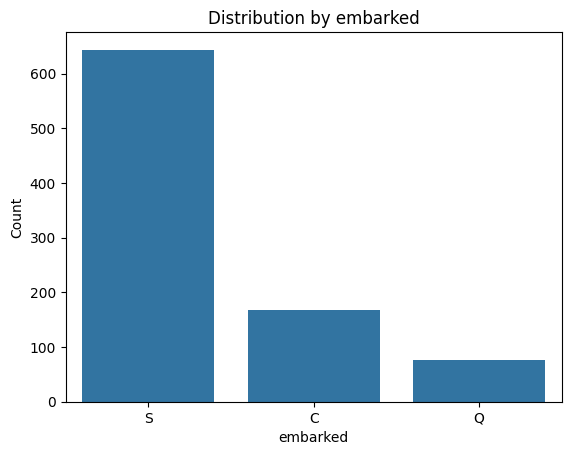

In [346]:
plt.Figure(figsize=(15, 4))
for col in ['survived', 'sex', 'pclass', 'embarked']:
    plt.title(f"Distribution by {col}")
    sns.countplot(data=df, x=col)
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

In [347]:
df['embarked'] = df['embarked'].fillna('S')
df['age']=df['age'].fillna(df['age'].median(), )

In [348]:
# age survive, fare survive, 

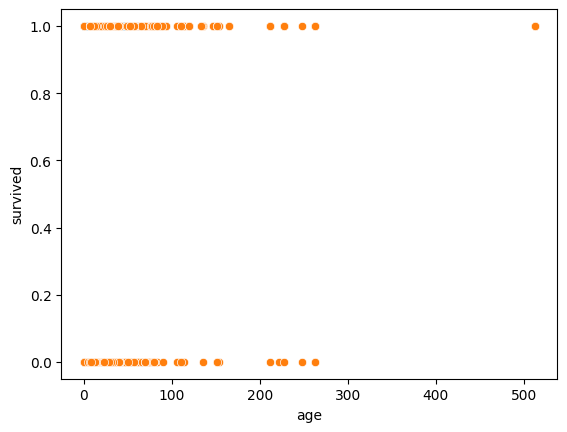

In [349]:
plt.Figure(figsize=(15, 4))
for col in ['age', 'fare']:
    sns.scatterplot(data=df, y='survived', x=col)


In [350]:
# Feature Engeenring

# Creating a family column by adding sibsp and parch

df['family_size'] = df['sibsp'] + df['parch'] + 1 # added one beacuse we are counting the passenger as well

In [351]:
# Extracting the titles that a person is called by (Could be important)

df['title'] = df['name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [352]:
df['title'].value_counts()

title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [353]:


df['title'] = df['title'].replace(
    ['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
      'Rare')
df['title'] = df['title'].replace('Mlle', 'Miss')
df['title'] = df['title'].replace('Ms', 'Miss')
df['title'] = df['title'].replace('Mme', 'Mrs')
df['title'] = df['title'].replace('Lady', 'Miss')

In [354]:
df['title'].value_counts()

title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [355]:
df_copy = df.copy()

In [356]:
df.drop(columns=['sibsp', 'parch', 'name'], axis=1, inplace=True)

In [358]:
def family_size(num):
    if num == 1:
        return "alone"
    elif num > 1 and num < 5:
        return "small"
    else: 
        return "large"

In [359]:
df['family_size'] = df['family_size'].apply(family_size)

Text(0.5, 1.0, 'Correlation Heatmap')

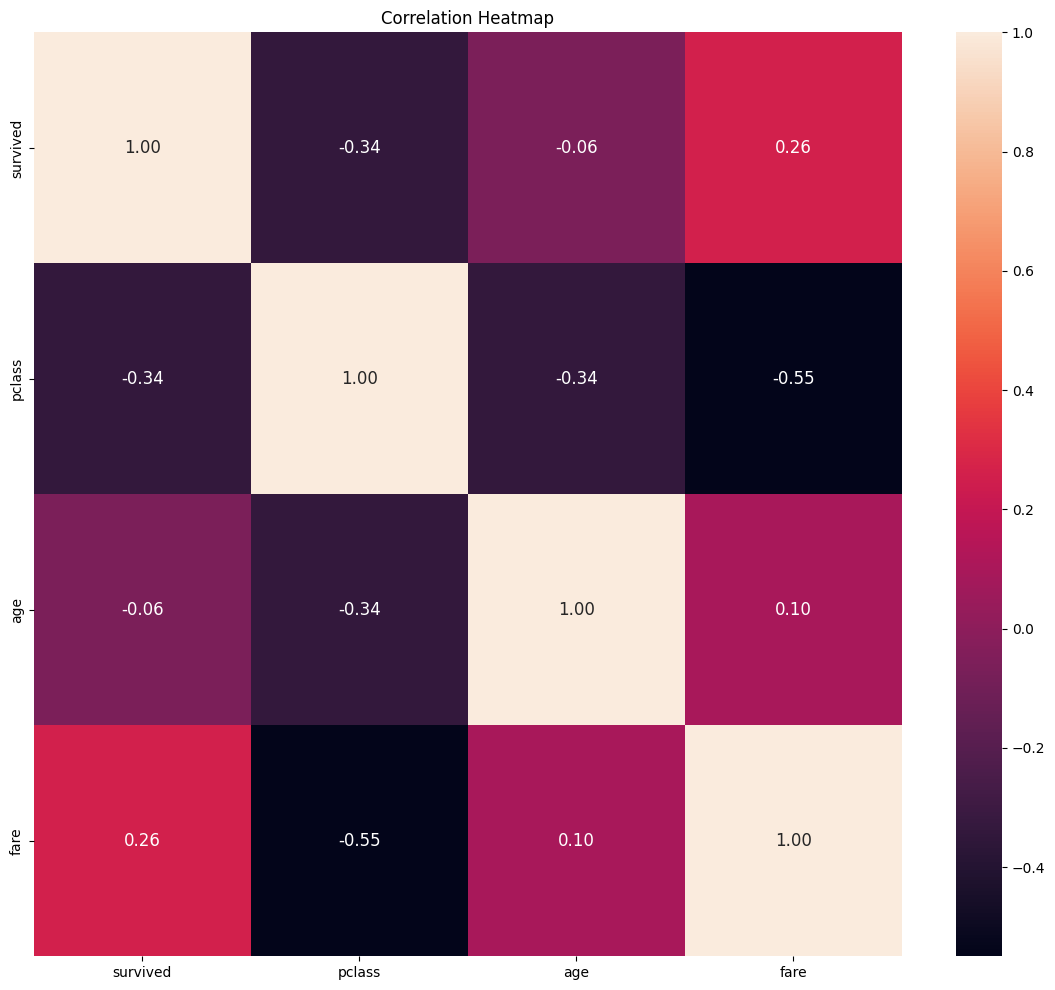

In [360]:
df_corr = df.corr(numeric_only=True)

plt.subplots(figsize =(14, 12))
sns.heatmap(df_corr, fmt=".2f", annot=True, annot_kws={'fontsize':12 })
plt.title("Correlation Heatmap")




In [361]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer # Helps to apply functions like standard scalar, one hot encoding to a specific number of columns 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


ModuleNotFoundError: No module named 'xgboost'

In [362]:
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [363]:
df

,survived,pclass,sex,age,fare,embarked,family_size,title
0,0,3,male,22.0,7.2500,S,small,Mr
1,1,1,female,38.0,71.2833,C,small,Mrs
2,1,3,female,26.0,7.9250,S,alone,Miss
3,1,1,female,35.0,53.1000,S,small,Mrs
4,0,3,male,35.0,8.0500,S,alone,Mr
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,alone,Rare
887,1,1,female,19.0,30.0000,S,alone,Miss
888,0,3,female,28.0,23.4500,S,small,Miss
889,1,1,male,26.0,30.0000,C,alone,Mr


In [366]:
# Exclude target column
feature_numeric_cols = ['pclass', 'age', 'fare']
feature_categorical_cols = ['sex', 'embarked', 'family_size', 'title']

target_col = 'survived'


In [367]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), feature_numeric_cols),
    ('cat', OneHotEncoder(), feature_categorical_cols)
])


In [368]:
from sklearn.pipeline import Pipeline

def create_pipeline(model):
    return Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])


In [369]:
from sklearn import ensemble, linear_model, neighbors, svm, tree, discriminant_analysis, naive_bayes

models = {
    # Ensemble Methods
    'RandomForest': ensemble.RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': ensemble.GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': ensemble.AdaBoostClassifier(n_estimators=100, random_state=42),

    # Linear Models
    'LogisticRegression': linear_model.LogisticRegression(max_iter=1000, random_state=42),
    'RidgeClassifier': linear_model.RidgeClassifier(random_state=42),

    # SVM
    'SVC': svm.SVC(probability=True, kernel='rbf', random_state=42),

    # Nearest Neighbor
    'KNN': neighbors.KNeighborsClassifier(),

    # Trees
    'DecisionTree': tree.DecisionTreeClassifier(random_state=42),

    # Discriminant Analysis
    'LDA': discriminant_analysis.LinearDiscriminantAnalysis(),
    
    # Naive Bayes
    'GaussianNB': naive_bayes.GaussianNB(),
}


In [370]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

results = {}

for name, model in models.items():
    pipe = create_pipeline(model)
    # 5-fold CV with accuracy
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores.mean()

# Convert to DataFrame and sort
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['CV_Accuracy'])
results_df = results_df.sort_values(by='CV_Accuracy', ascending=False)
print(results_df)


                    CV_Accuracy
LDA                    0.825874
RidgeClassifier        0.824466
SVC                    0.824456
GradientBoosting       0.821728
AdaBoost               0.820309
LogisticRegression     0.820290
GaussianNB             0.811839
KNN                    0.807673
RandomForest           0.804954
DecisionTree           0.761381


/tmp/ipykernel_722/2450485032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='CV_Accuracy', data=results_df, palette="viridis")


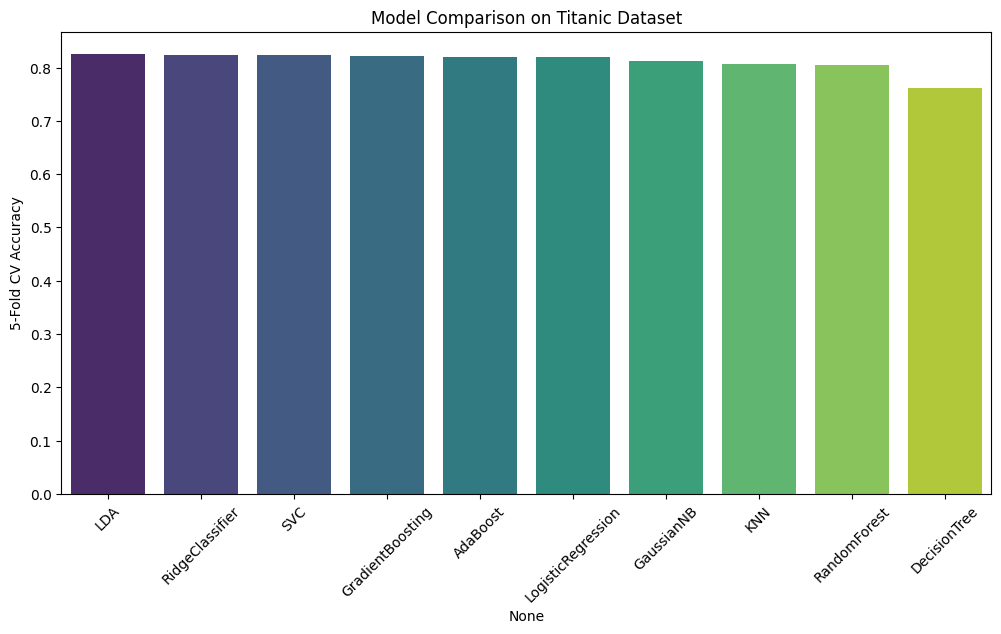

In [371]:
plt.figure(figsize=(12,6))
sns.barplot(x=results_df.index, y='CV_Accuracy', data=results_df, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("5-Fold CV Accuracy")
plt.title("Model Comparison on Titanic Dataset")
plt.show()


In [372]:
top_models = {
    'LDA': discriminant_analysis.LinearDiscriminantAnalysis(),

    'RidgeClassifier': linear_model.RidgeClassifier(random_state=42),

    'SVC': svm.SVC(probability=True, kernel='rbf', random_state=42),

}

In [376]:
param_grids = {
    'LDA': {
        # No hyperparameters really needed for basic LDA
    },
    'RidgeClassifier': {
        'classifier__alpha': [0.1, 1.0, 10.0]
    },
    'SVC': {
        'classifier__C': [0.1, 1, 10],
        'classifier__gamma': ['scale', 'auto'],
        'classifier__kernel': ['rbf', 'poly']
    }
}


In [377]:
from sklearn.model_selection import GridSearchCV

best_models = {}

for name, model in top_models.items():
    print(f"Processing {name}...")
    pipe = create_pipeline(model)
    
    if param_grids.get(name):
        grid = GridSearchCV(pipe, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_
        print(f"Best params for {name}: {grid.best_params_}")
        print(f"Best CV accuracy: {grid.best_score_:.4f}\n")
    else:
        # No hyperparameters to tune
        pipe.fit(X_train, y_train)
        best_models[name] = pipe


Processing LDA...
Processing RidgeClassifier...


/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/pyth

Best params for RidgeClassifier: {'classifier__alpha': 0.1}
Best CV accuracy: 0.8259

Processing SVC...
Best params for SVC: {'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Best CV accuracy: 0.8287



In [378]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    
    print(f"{name} Test Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    if roc:
        print(f"ROC-AUC: {roc:.4f}")
    print("-------------------------")


LDA Test Metrics:
Accuracy: 0.8436
F1-score: 0.7879
ROC-AUC: 0.8789
-------------------------
RidgeClassifier Test Metrics:
Accuracy: 0.8436
F1-score: 0.7879
-------------------------
SVC Test Metrics:
Accuracy: 0.8268
F1-score: 0.7597
ROC-AUC: 0.8527
-------------------------


In [379]:
import joblib

# Save the model (replace 'lda' with the model you choose)
best_model = best_models['LDA']  # or 'RidgeClassifier'
joblib.dump(best_model, 'titanic_best_model.pkl')
print("Model saved successfully!")


Model saved successfully!
